# Кластеризация и классификация Покемонов

__Покемон__ (яп. ポケットモンスター Карманные монстры; ポケモン Pokémon) — вымышленные существа, играющие центральную роль во франшизе «Покемон». Им присущи несколько фантастических способностей, которые не демонстрируются большинством реальных животных, например, манипулирование электричеством или огонь.

Выборка состоит из 1045 наблюдений и 8 признаков. Требуется на основе этого набора данных, провести кластеризацию, для создания моделей классификации.

Работу выполнили __Кабанов Илья__ и __Каскинбаев Ильнур__, 22П-3.

<img style="align-self: center" src="https://resizer.mail.ru/p/c4b6c5a3-cd4b-551f-a51a-a935f819aa7a/AQAKJdLoLQoP1-aymwtmZzY88QWBP9oI1K5nnhanRbX43GDJPsckjSdSe0UvKo3HrNbes5RsOrPKWNZLh5knaIOadtg.jpg"/>

In [14]:
from IPython import display
display.Audio(url="От винта!.mp3")

### Импортирование библиотек для загрузки и работы с датасетом

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

In [5]:
df = pd.read_csv("pokemon.csv")

In [7]:
df.head()

Name  Total  HP  Attack  Defence  Sp_attack  Sp_defence  Speed
0      Bulbasaur    318  45      49       49         65          65     45
1        Ivysaur    405  60      62       63         80          80     60
2       Venusaur    525  80      82       83        100         100     80
3  Mega Venusaur    625  80     100      123        122         120     80
4     Charmander    309  39      52       43         60          50     65

__Признаки__:

__Name__ - Имя

__Total__ - Сумма характеристик

__HP__ - Количество жизней

__Attack__ - Атака

__Defence__ - Защита

__Sp_attack__ - Супер Атака

__Sp_defence__ - Супер Защита

__Speed__ - Скорость

#### Просмотр данных

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB


In [12]:
df.describe()

Total           HP       Attack      Defence    Sp_attack  \
count  1045.000000  1045.000000  1045.000000  1045.000000  1045.000000   
mean    439.314833    70.067943    80.466986    74.661244    73.022010   
std     121.970701    26.671411    32.413665    31.237903    32.724797   
min     175.000000     1.000000     5.000000     5.000000    10.000000   
25%     330.000000    50.000000    55.000000    50.000000    50.000000   
50%     458.000000    68.000000    77.000000    70.000000    65.000000   
75%     515.000000    82.000000   100.000000    90.000000    95.000000   
max    1125.000000   255.000000   190.000000   250.000000   194.000000   

        Sp_defence        Speed  
count  1045.000000  1045.000000  
mean     72.288995    68.807656  
std      28.074148    30.210094  
min      20.000000     5.000000  
25%      50.000000    45.000000  
50%      70.000000    65.000000  
75%      90.000000    90.000000  
max     250.000000   200.000000

In [13]:
# Проверка на пустые значения
df.isna().sum()

Name          0
Total         0
HP            0
Attack        0
Defence       0
Sp_attack     0
Sp_defence    0
Speed         0
dtype: int64

In [14]:
# Проверка на дублирующие значения
df.duplicated().sum()

5

In [15]:
df[df.duplicated()]

Name  Total  HP  Attack  Defence  Sp_attack  Sp_defence  Speed
421  Mega Castform X    420  70      70       70         70          70     70
572     Mega Rotom X    520  50      65      107        105         107     86
573     Mega Rotom X    520  50      65      107        105         107     86
574     Mega Rotom X    520  50      65      107        105         107     86
869  Mega Oricorio X    476  75      70       70         98          70     93

### Первичный вывод после просмотра предоставленных данных

Данные в предоставленном датасете - нормальные, выбросов не наблюдается, пустых значений нет, имеются пару дублированных значений.

### Предобработка данных

Удалим дублированные записи:

In [22]:
df.drop_duplicates(inplace=True)

Перед началом кластеризации, из датасета убирам столбец с именами покемонов:

In [24]:
del df["Name"]

In [25]:
df

Total   HP  Attack  Defence  Sp_attack  Sp_defence  Speed
0       318   45      49       49         65          65     45
1       405   60      62       63         80          80     60
2       525   80      82       83        100         100     80
3       625   80     100      123        122         120     80
4       309   39      52       43         60          50     65
...     ...  ...     ...      ...        ...         ...    ...
1040    580  100     145      130         65         110     30
1041    580  100      65       60        145          80    130
1042    500  100      80       80         80          80     80
1043    680  100     165      150         85         130     50
1044    680  100      85       80        165         100    150

[1040 rows x 7 columns]

In [26]:
df.shape

(1040, 7)

### Разведочный анализ данных

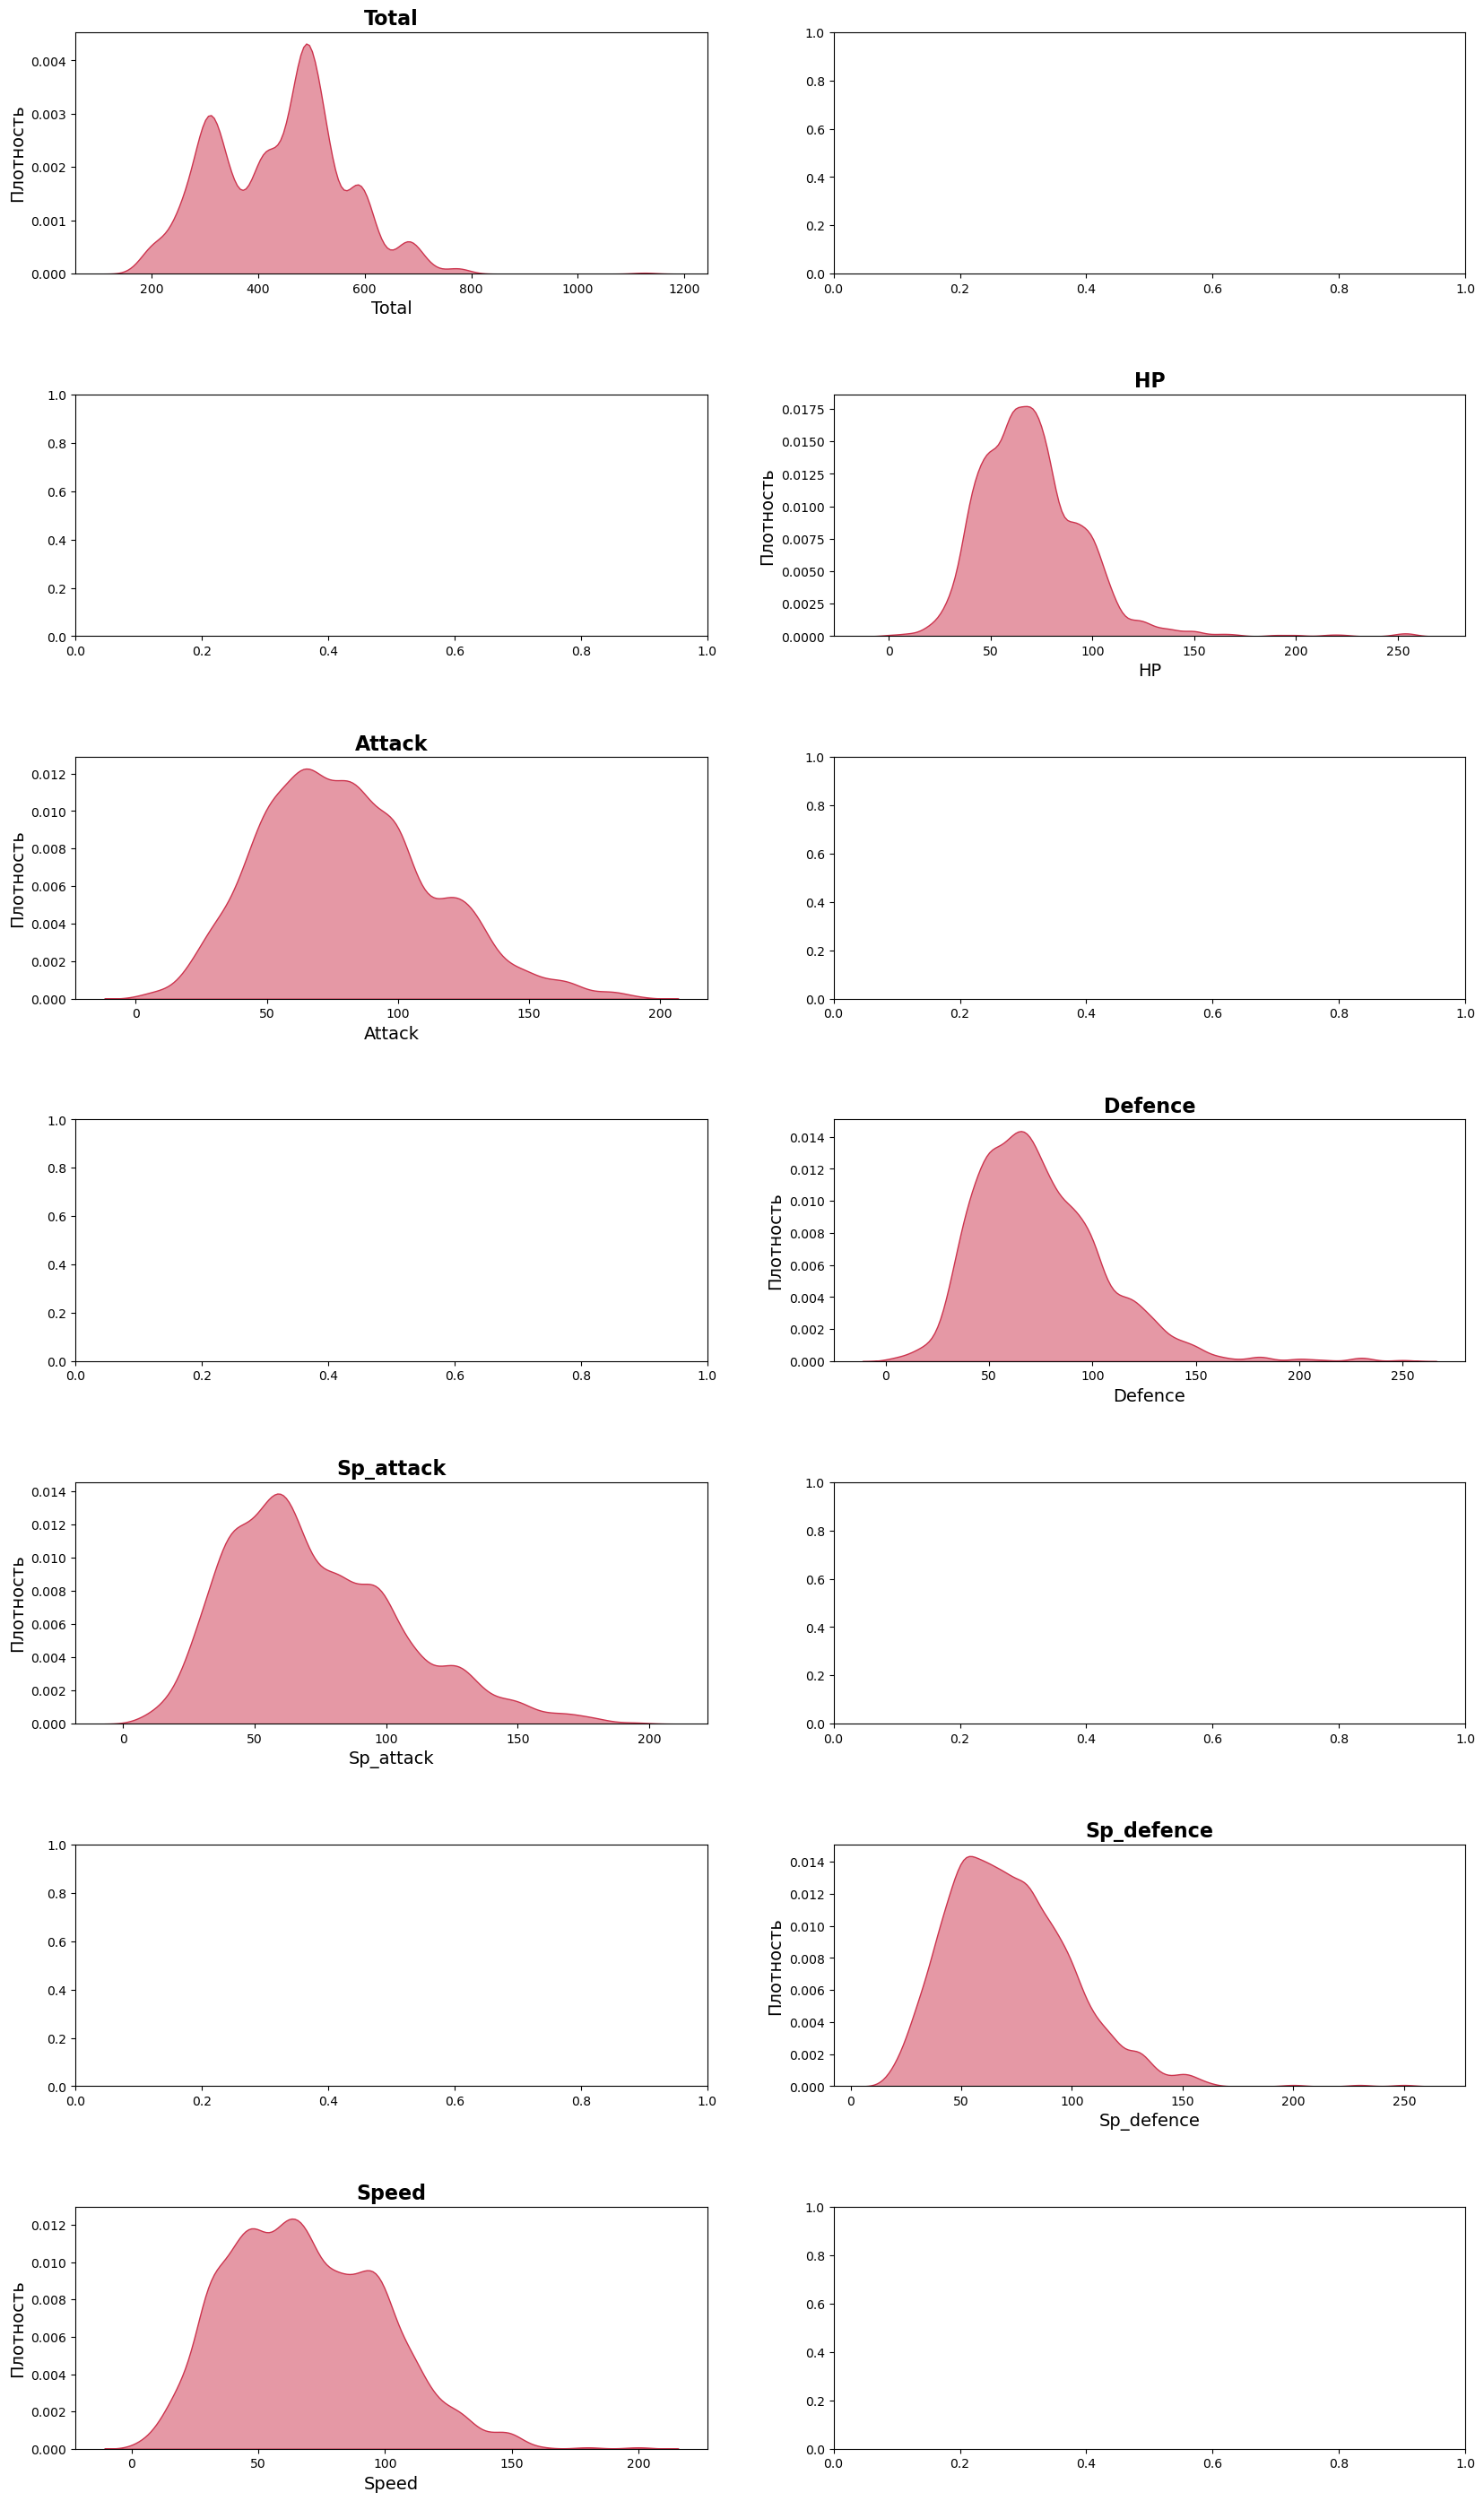

In [29]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(7,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = df.columns

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 1, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.5,
                bw_adjust=.7,
                color = [0.8, 0.2, 0.3],
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show();

<li> Некоторые признаки близки к нормальному распределению (Total, Speed)</li>
<li> Явновыраженных выбросов не обнаружено</li>
<li> Признаки имеют одинаковые масштабы измерений</li>

In [32]:
### Матрица корелляции данных:

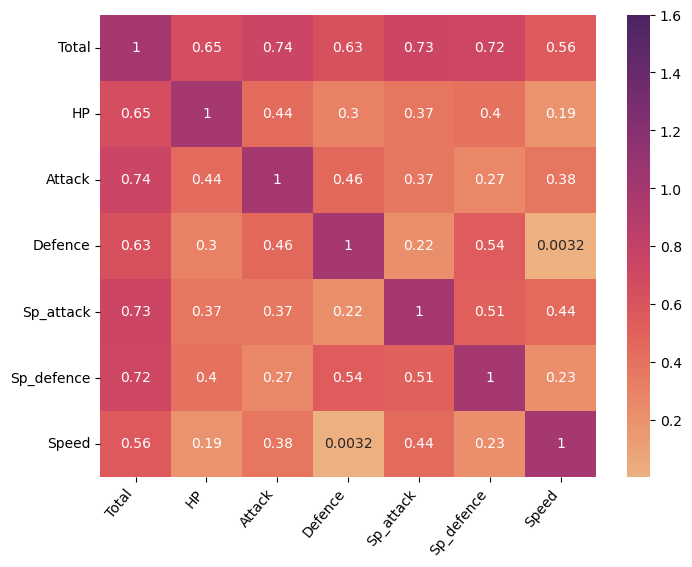

In [34]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),cmap = sns.color_palette("flare", as_cmap=True),annot = True,vmax = 1.6);
plt.xticks(rotation=50, ha='right');

### Промежуточный вывод
__Total__ очень хорошо коррелирует с остальными признаками. Также проглядывается зависимость между __Sp_attack__ и __Sp_defence__ 

### Изучим распределение данных датасета

In [38]:
X = df.iloc[:, [0,1,2,3,4,5,6]].values

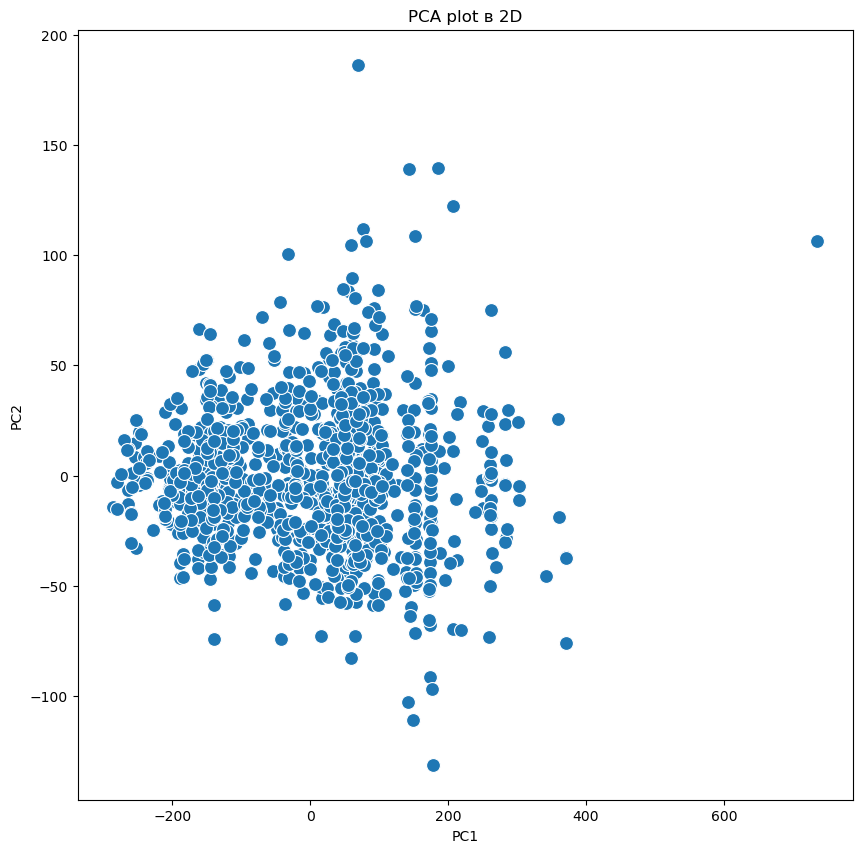

In [41]:
from sklearn.decomposition import PCA
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))
    
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                s=100)

plt.title('PCA plot в 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

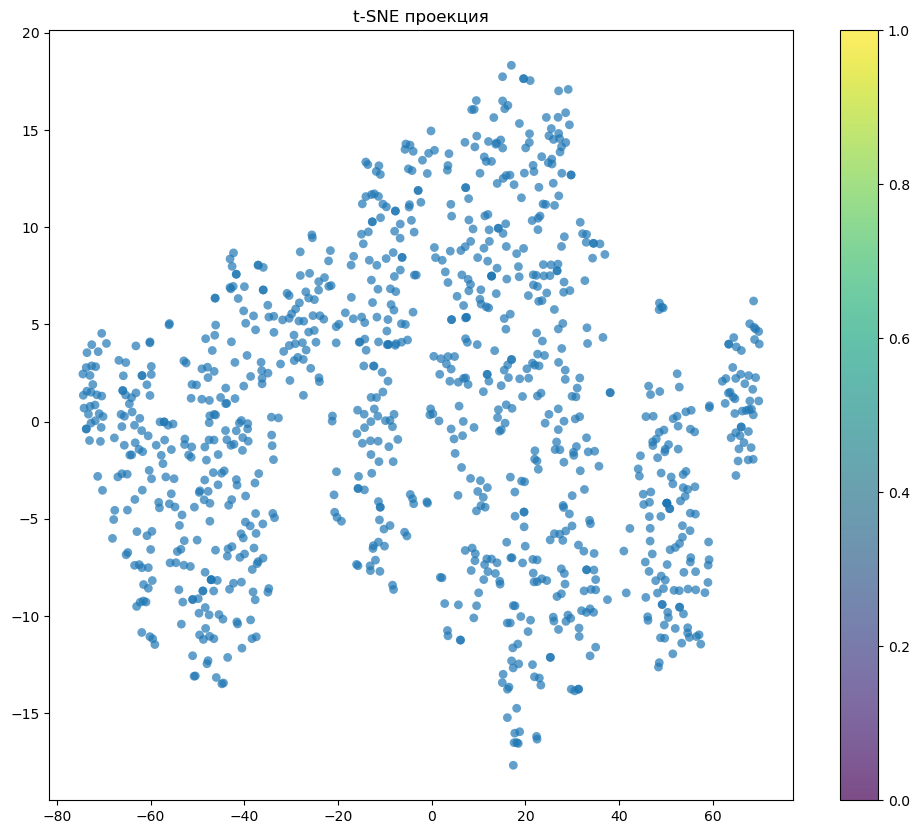

In [42]:
from sklearn.manifold import TSNE
def TSNEplot(pred=None):    
    tsne = TSNE(random_state=1)

    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12, 10))
    plt.scatter(X_tsne[:, 0], 
                X_tsne[:, 1], 
                c = pred, 
                edgecolor="none", 
                alpha=0.7, s=40,
        cmap=plt.cm.get_cmap("flare", 3))

    plt.colorbar()
    plt.title("t-SNE проекция");
TSNEplot()

In [43]:
import plotly.express as px
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data, 
        size=0.1*np.ones(len(X)), 
        opacity = 1,
        title='PCA plot в 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

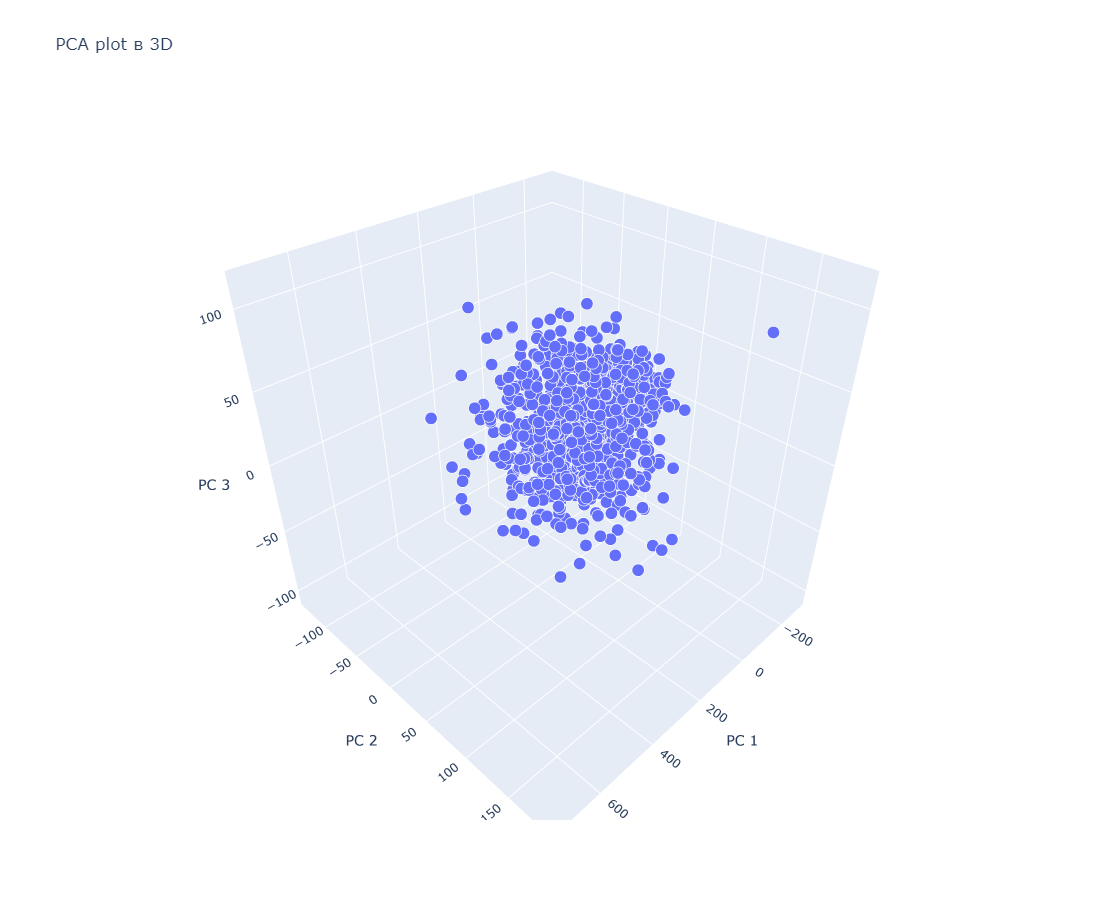

In [45]:
PCAplot3D(X)

#### Чтобы определить какие модели мы будем использовать, просмотрим справочник:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

На графике распределения, схожим с нашим, методы демонстрируют достаточно хорошую работу.

В данном случае известно следущее: 
<ul>
<li> Количество данных не слишком велико</li>
<li> При визуальном осмотре можно выделить 3 кластера </li>
<li> Проекция на плоскость имеет умеренную дисперсию</li>
</ul>

Выбор пал на методы:

__K-Means__

__Spectral Clustering__

__Agglomerative Clustering__

#### Перед началом работ с методами кластеризации нужно импортировать библеотеки для работы с ними. 

### K-means

Для K-means необходимо определить кол-во кластеров

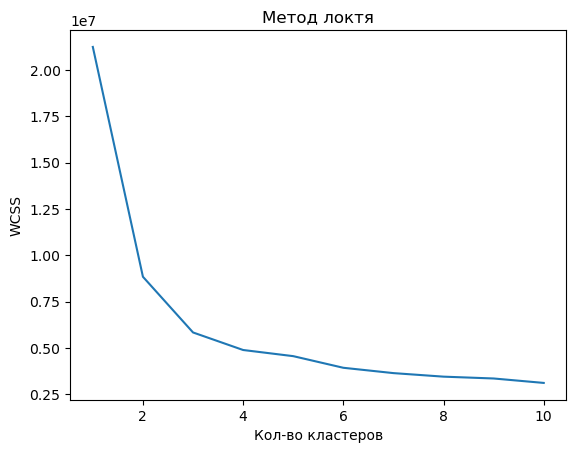

In [51]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')
plt.show()

Кол-во кластеров 3

Приступим к самой кластеризации:

In [54]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=28)

In [55]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=28)

In [56]:
pred=kmeans.fit_predict(X)

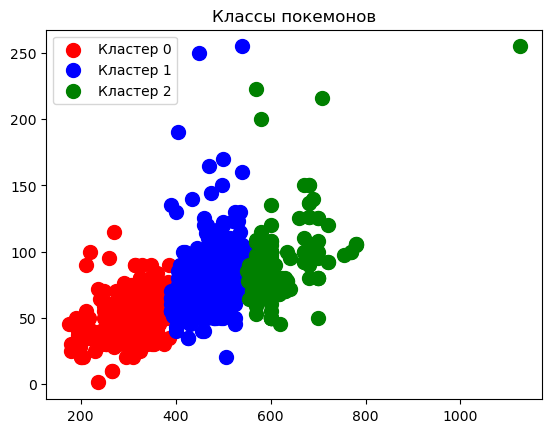

In [57]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Кластер 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Кластер 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Кластер 2')

plt.title('Классы покемонов')

plt.legend()
plt.show()

In [58]:
pca = PCA(n_components=2)

kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

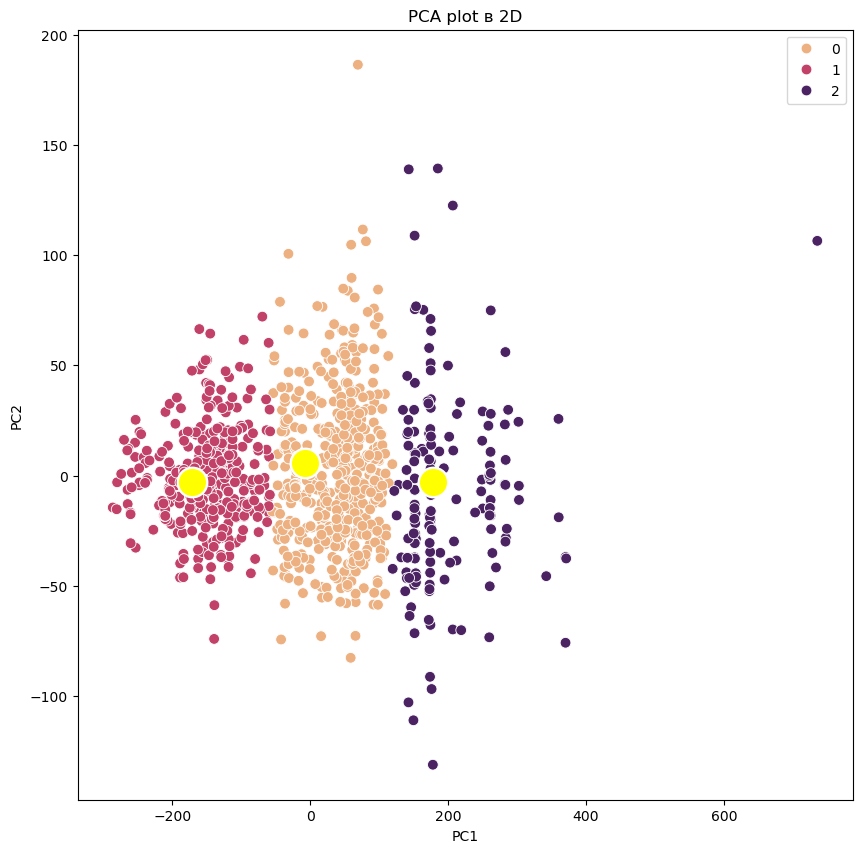

In [59]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x = centroids_pca[:,0], 
                y =  centroids_pca[:,1],  
                marker="o", 
                s=450, 
                color = 'yellow')
plt.title('PCA plot в 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

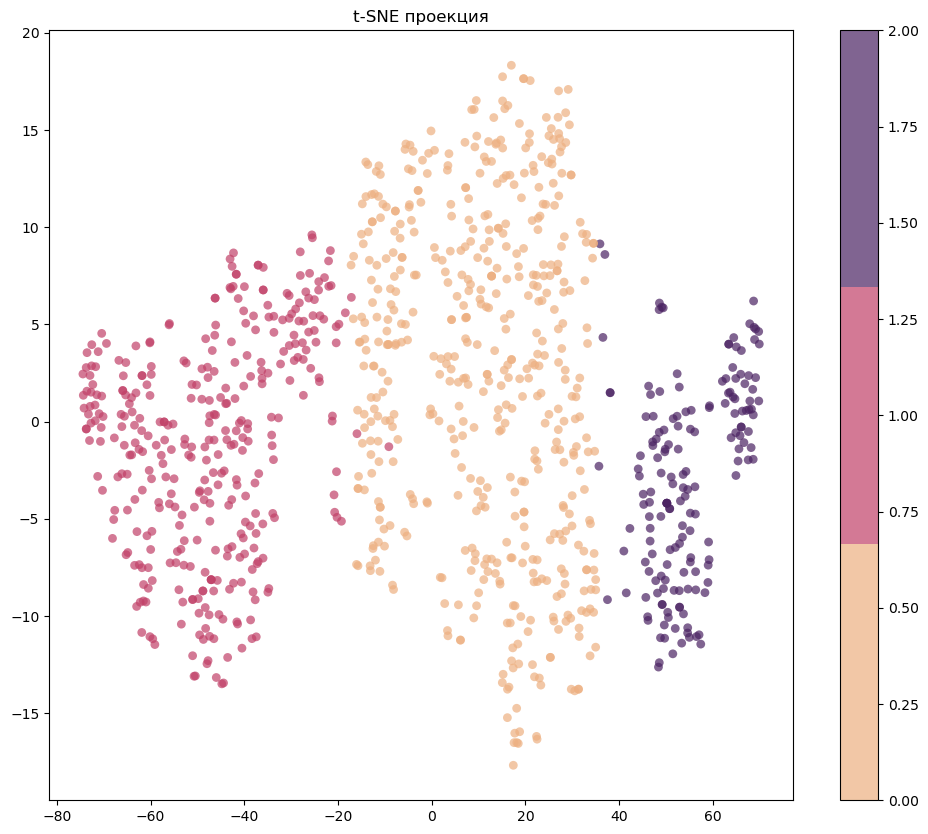

In [60]:
TSNEplot(pred_k)

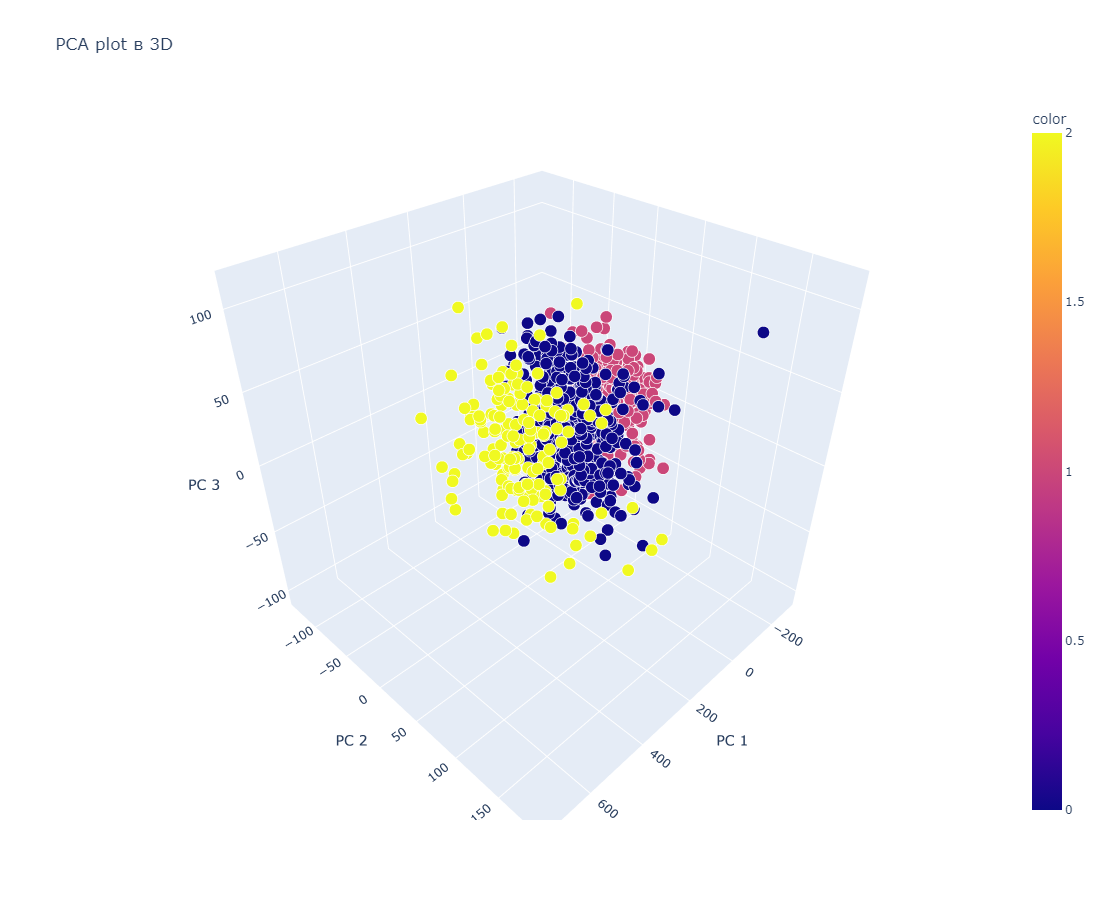

In [61]:
PCAplot3D(X, pred_k)

### Agglomerative Clustering

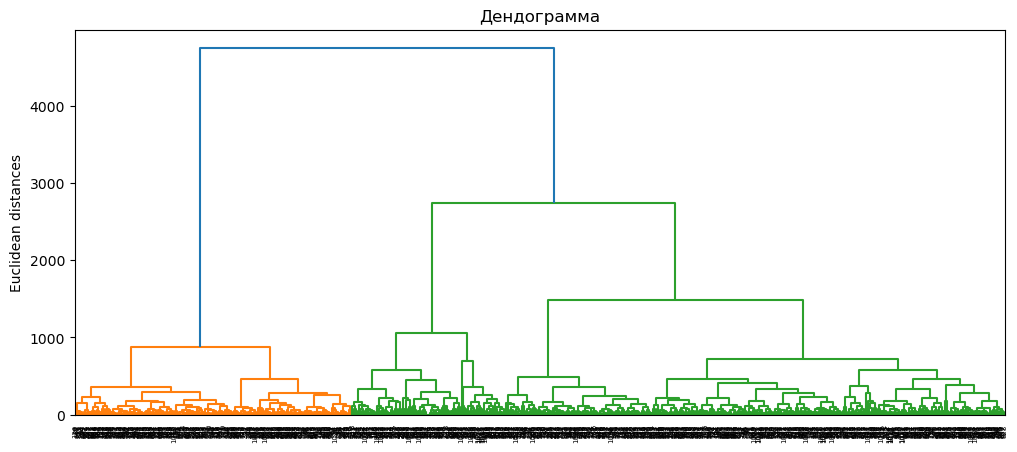

In [63]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Дендограмма')
plt.ylabel('Euclidean distances')
plt.show()

In [64]:
clustering_ward = AgglomerativeClustering(3).fit(X)
pred_ward = clustering_ward.labels_

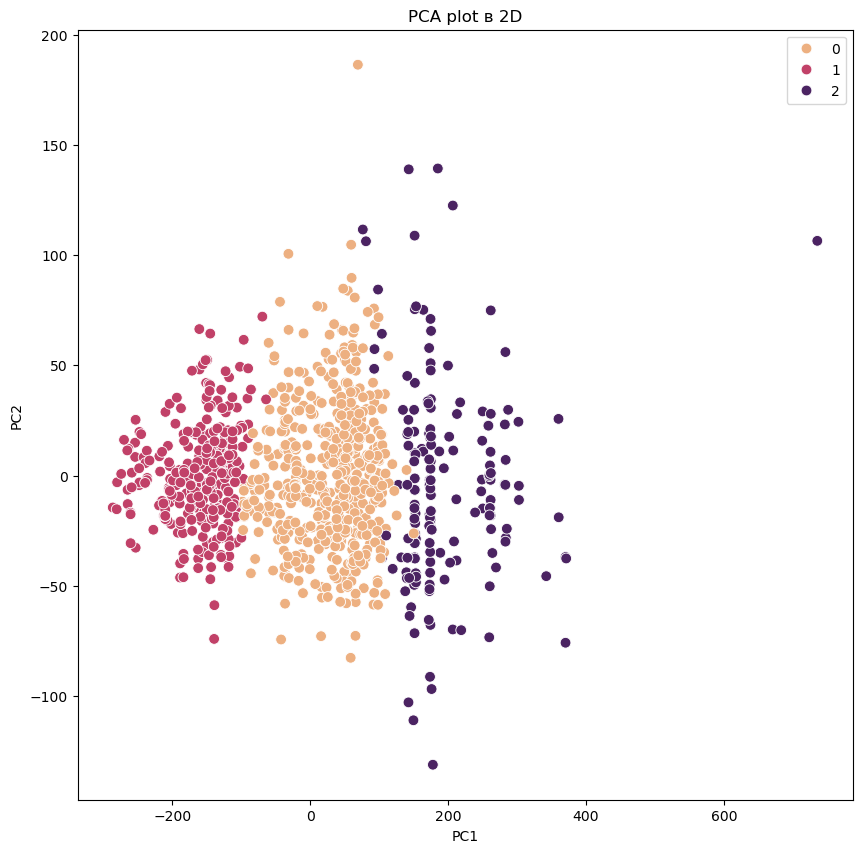

In [65]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_ward, 
                palette="flare", 
                s=60)
plt.title('PCA plot в 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

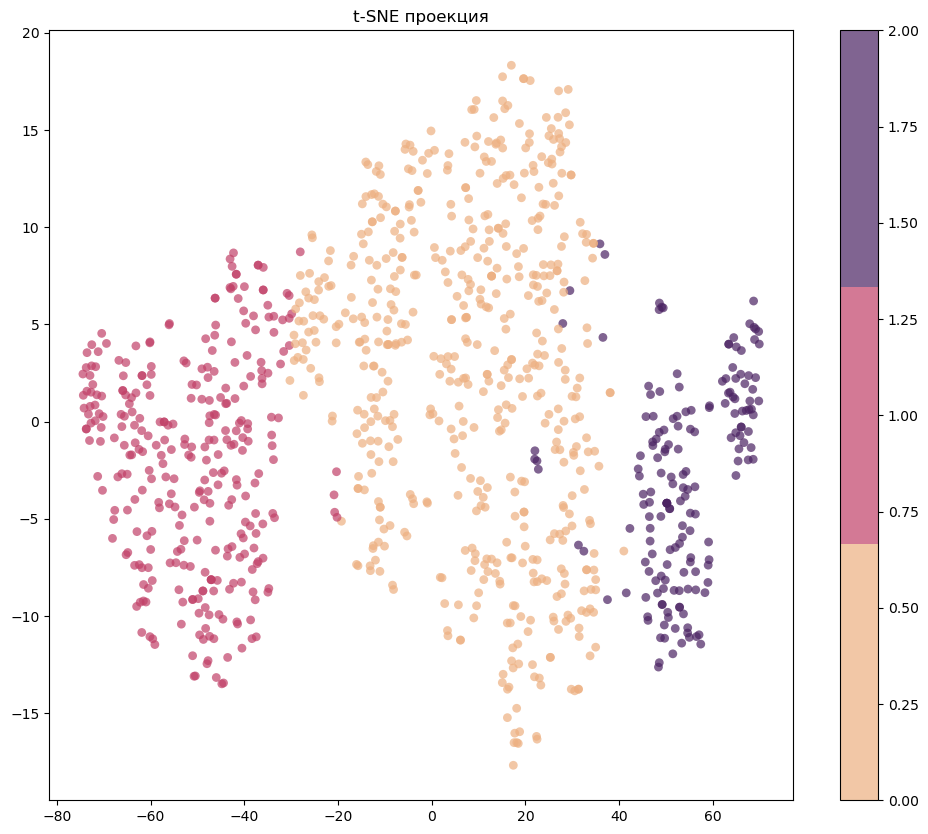

In [66]:
TSNEplot(pred_ward)

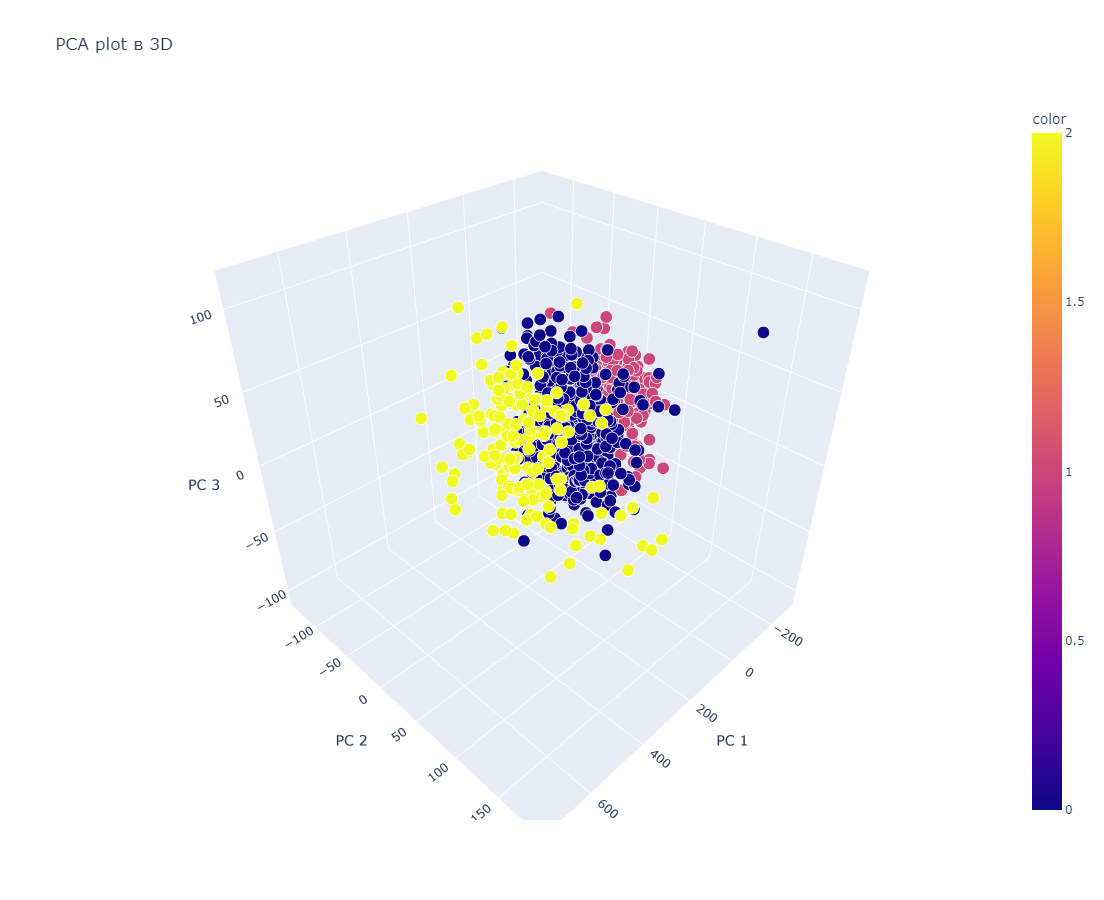

In [67]:
PCAplot3D(X, pred_ward)

### Spectral Clustering

In [69]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

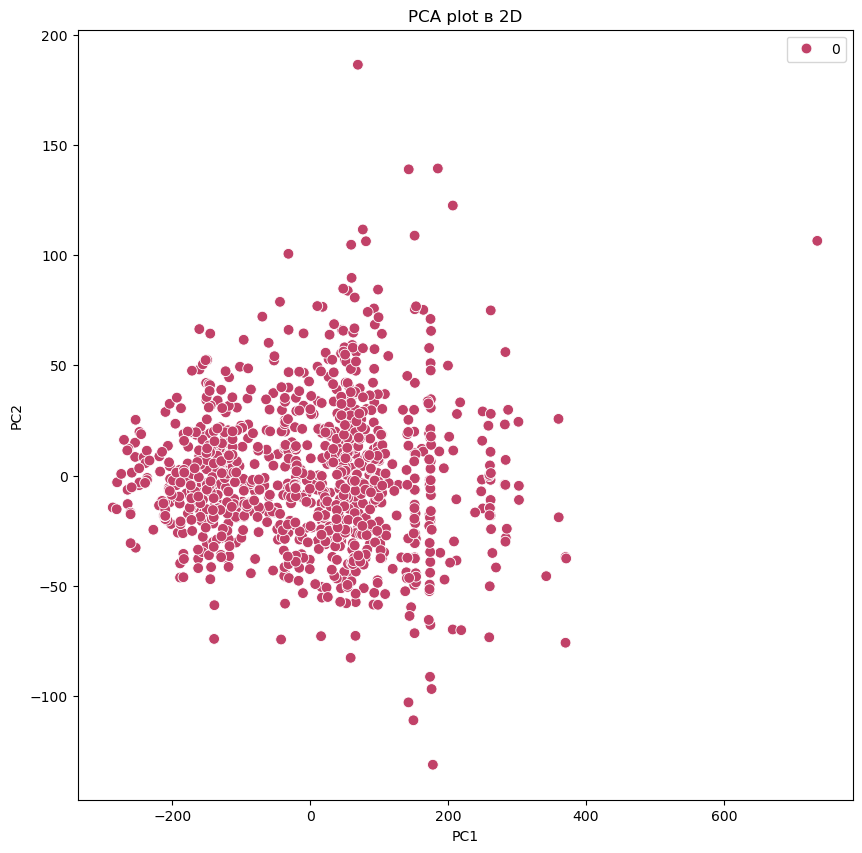

In [70]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_sp, 
                palette="flare", 
                s=60)
plt.title('PCA plot в 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

Эта модель кластеризировала данные весьма долго, и результат получился плохим. Вывод: данная модель оказалась неэфективной.

#### Общий вывод результатов кластеризации разных моделей

In [73]:
from sklearn.metrics import accuracy_score, rand_score
y = df.iloc[:, 0]
rs_k = rand_score(kmeans.labels_, y) 
rs_ward = rand_score(pred_ward, y)
rs_sp = rand_score(pred_sp, y)

print('\nK-Means')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 1012 предсказано верно \n\n".format(rs_k, rs_k * 1012))


print('Agglomerative Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 1012 предсказано верно \n\n".format(rs_ward, rs_ward * 1012))


print('Spectral Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 1012 предсказано верно \n".format(rs_sp, rs_sp * 1012))


K-Means
_____________________________________________

 rand_score = 0.6226290071814614 

 630.1005552676389 из 1012 предсказано верно 


Agglomerative Clustering
_____________________________________________

 rand_score = 0.6071888650329459 

 614.4751314133413 из 1012 предсказано верно 


Spectral Clustering
_____________________________________________

 rand_score = 0.011784630191752426 

 11.926045754053455 из 1012 предсказано верно 



### Промежуточный вывод
Среди 3 моделей кластеризации - наилучший результат выдала __K-Means__ (rand_score = 0.62).
Отберем её предсказанные классы и используем их для построения моделей классификации.

### Классификация данных для метода класстеризации K-means

In [76]:
print(*kmeans.labels_, sep=', ')

1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0

In [77]:
kmeans.labels_.shape

(1040,)

In [78]:
df['cluster'] = pd.Series(kmeans.labels_)

In [79]:
df[df['cluster'].isna()].count()

Total         5
HP            5
Attack        5
Defence       5
Sp_attack     5
Sp_defence    5
Speed         5
cluster       0
dtype: int64

In [80]:
df['cluster']

0       1.0
1       0.0
2       0.0
3       2.0
4       1.0
       ... 
1040    NaN
1041    NaN
1042    NaN
1043    NaN
1044    NaN
Name: cluster, Length: 1040, dtype: float64

In [81]:
df.reset_index().reset_index()

level_0  index  Total   HP  Attack  Defence  Sp_attack  Sp_defence  \
0           0      0    318   45      49       49         65          65   
1           1      1    405   60      62       63         80          80   
2           2      2    525   80      82       83        100         100   
3           3      3    625   80     100      123        122         120   
4           4      4    309   39      52       43         60          50   
...       ...    ...    ...  ...     ...      ...        ...         ...   
1035     1035   1040    580  100     145      130         65         110   
1036     1036   1041    580  100      65       60        145          80   
1037     1037   1042    500  100      80       80         80          80   
1038     1038   1043    680  100     165      150         85         130   
1039     1039   1044    680  100      85       80        165         100   

      Speed  cluster  
0        45      1.0  
1        60      0.0  
2        80      0.0  
3        80      2.0  
4        65      1.0  
...     ...      ...  
1035     30      NaN  
1036    130      NaN  
1037     80      NaN  
1038     50      NaN  
1039    150      NaN  

[1040 rows x 10 columns]

In [82]:
df

Total   HP  Attack  Defence  Sp_attack  Sp_defence  Speed  cluster
0       318   45      49       49         65          65     45      1.0
1       405   60      62       63         80          80     60      0.0
2       525   80      82       83        100         100     80      0.0
3       625   80     100      123        122         120     80      2.0
4       309   39      52       43         60          50     65      1.0
...     ...  ...     ...      ...        ...         ...    ...      ...
1040    580  100     145      130         65         110     30      NaN
1041    580  100      65       60        145          80    130      NaN
1042    500  100      80       80         80          80     80      NaN
1043    680  100     165      150         85         130     50      NaN
1044    680  100      85       80        165         100    150      NaN

[1040 rows x 8 columns]

In [83]:
df.dropna(inplace=True)

In [84]:
df.reset_index(drop=True, inplace=True)

In [85]:
del df['Total']

In [86]:
df['cluster'] = df['cluster'].astype(int)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HP          1035 non-null   int64
 1   Attack      1035 non-null   int64
 2   Defence     1035 non-null   int64
 3   Sp_attack   1035 non-null   int64
 4   Sp_defence  1035 non-null   int64
 5   Speed       1035 non-null   int64
 6   cluster     1035 non-null   int32
dtypes: int32(1), int64(6)
memory usage: 52.7 KB


Датасет готов к классификации.

## Классификация

Для моделей классификации были выбраны:

- __KNeigborsClassifier__ - простой и устойчивый к выбросам, но необходим точный подбор кол-ва соседей;
  
- __Gaussian Naive Bayes__ - требует небольшого объема обучающих данных и быстрый в обучение, но плохо предсказывает;

- __Logistic Regression__ - она не сильно нам подходит, так как у нас 3 значения целевой переменной, но для представления полной картины, мы используем его тоже;

#### KNeigborsClassifier

In [90]:
from sklearn.model_selection import train_test_split
X = df[['HP', 'Attack', 'Defence',	'Sp_attack', 'Sp_defence','Speed']]
y = df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
y_pred = knn.predict(X_test)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       164
           1       0.52      0.48      0.50       105
           2       0.62      0.38      0.47        42

    accuracy                           0.59       311
   macro avg       0.59      0.53      0.55       311
weighted avg       0.59      0.59      0.58       311



In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [95]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.588122300318733
0.5916398713826366
0.5842426024331202


In [96]:
from sklearn.metrics import confusion_matrix

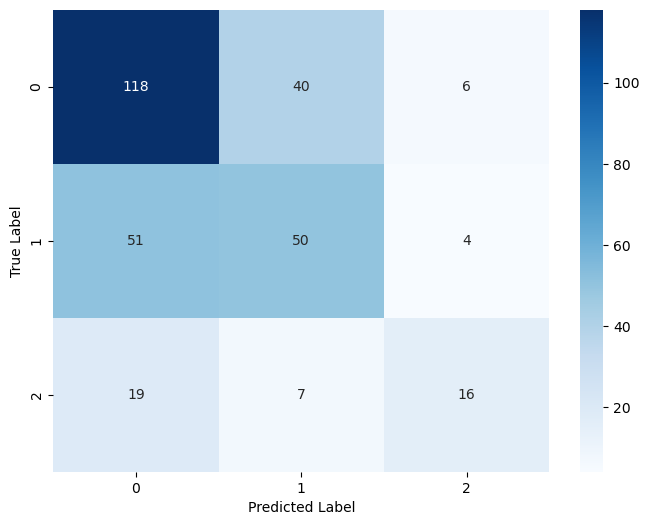

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Gaussian Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [100]:
y_pred = gnb.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       164
           1       0.55      0.61      0.58       105
           2       0.67      0.69      0.68        42

    accuracy                           0.64       311
   macro avg       0.64      0.65      0.65       311
weighted avg       0.65      0.64      0.65       311



In [102]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.6494321522863268
0.6430868167202572
0.6450650710155156


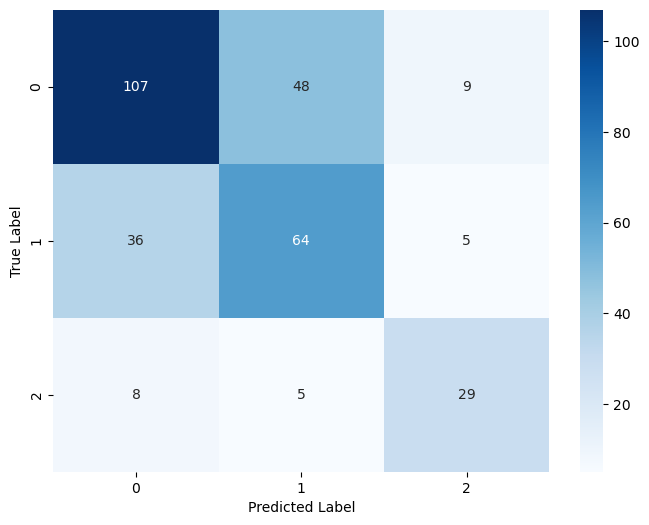

In [103]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [107]:
y_pred = lr.predict(X_test)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       164
           1       0.55      0.55      0.55       105
           2       0.67      0.48      0.56        42

    accuracy                           0.62       311
   macro avg       0.62      0.57      0.59       311
weighted avg       0.62      0.62      0.62       311



In [110]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.6182865463117845
0.617363344051447
0.6153033336736267


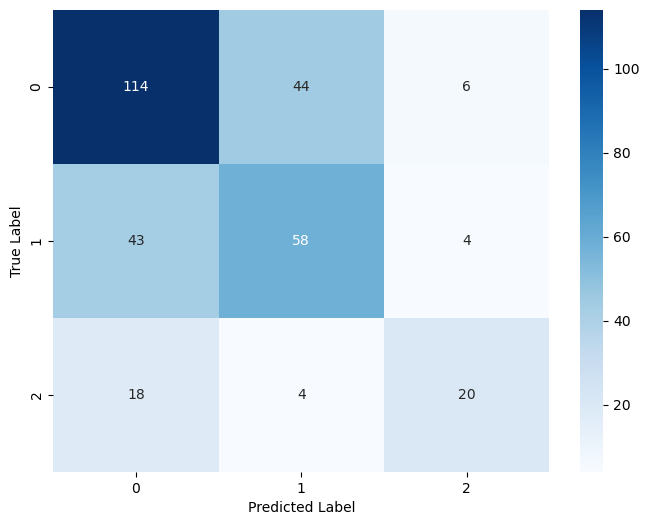

In [112]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Настройка гиперпараметров для KNeighborsClassifier

In [114]:
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 7}


In [115]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [116]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       164
           1       0.60      0.52      0.56       105
           2       0.67      0.48      0.56        42

    accuracy                           0.65       311
   macro avg       0.65      0.59      0.61       311
weighted avg       0.65      0.65      0.64       311



In [117]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.6465678170196701
0.6495176848874598
0.6428753091514006


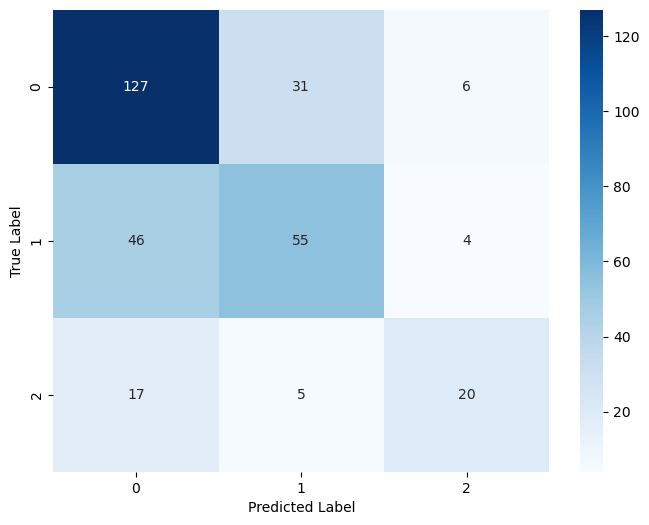

In [118]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<Axes: >

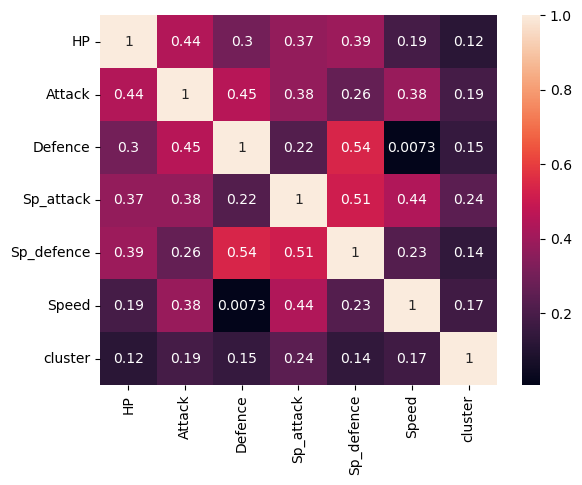

In [119]:
sns.heatmap(data=df.corr(), annot=True)

## Итоги работы

__1.__ Был получен датасет состоящий из 1045 наблюдений и 8 признаков.

__2.__ Была проведена Предобработка данных, удалены пустые и дублирующие значения. Также был удален столбец Name.

__3.__ После построения матрицы корреляций было установлено: хорошая корреляция Total со всеми признаками и проглядывается зависимость между Sp_attack и Sp_defence.

__4.__ Были построены 3 модели для кластеризации: K-Means, Spectral Clustering и Agglomerative Clustering. Наилучший результат был получен - K-Means.

__5.__ На основе полученных кластеров, были построены модели классификации: KNeigborsClassifier, Gaussian Naive Bayes и Logistic Regression. Наилучший результат был получен - KNeighborsClassifier (0.59). После настройки гиперпараметров результат был форсирован до 0.65.